# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель:** выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

# Описание данных #

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении


### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеки pandas, matplotlib, seaborn, numpy

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [9]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Построим гистограммы для количественных значений

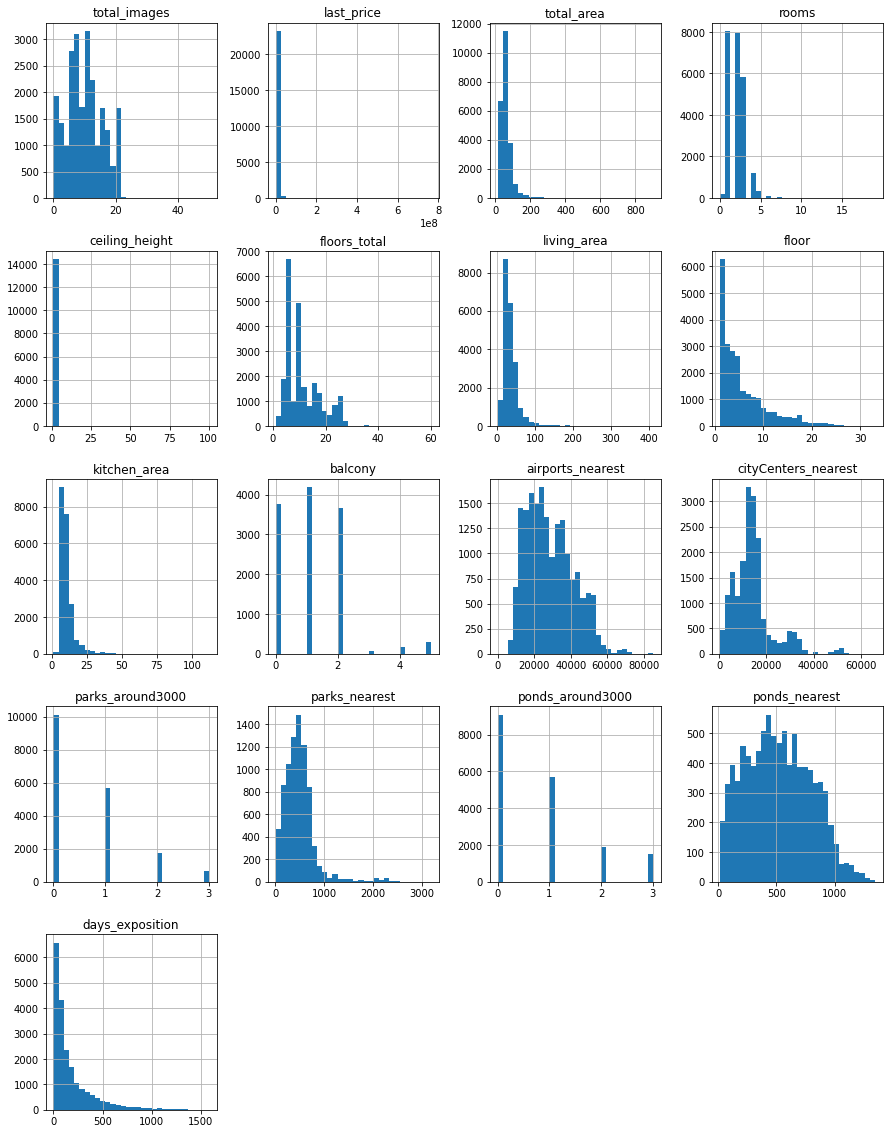

In [10]:
df.hist(bins=30, figsize=(15, 20));

**Вывод:** В датафрейме содержатся пропуски и ошибки в названиях столбцов.

### Предобработка данных

Посчитаем количество пропусков

In [11]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [12]:
(df.isna().sum() / len(df)).round(4)*100

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

Переименуем название столбца в соответствии со стилем snake_case

In [13]:
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

Удалим пропуски в двух столбцах: 'locality_name', 'floors_total' т.к. они не имеют статистической значимости(0.21% и 0.36% соответственно).

In [14]:
df = df.dropna(subset=['locality_name', 'floors_total'])

Перезапишем индексы, чтобы убрать пропуски в индексах после удаления строк

In [15]:
df = df.reset_index(drop=True)

Заполним пропуски в столбце living_area медианным значением по каждому типу(количество комнат) из столбца rooms

In [16]:
for t in df['rooms'].unique():
    df.loc[(df['rooms'] == t) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == t), 'living_area'].median()

Заполним пропуски в столбце ceiling_height медианными значениями 

In [17]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

Можно предположить, что пропуски в столбце kitchen_area вызваны тем, что апартаменты, студии и открытые планировки не предполагают отдельное помещение для кухни. Поэтому для всех столбцов где is_apartment, studio, open_plan == True, заполним kitchen_area значением 0

In [18]:
df.loc[(df['kitchen_area'].isna())|(df['is_apartment'] == True)|(df['studio'] == True)|(df['open_plan'] == True), \
       'kitchen_area'] = 0

In [19]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11475
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Заполним в столбце balcony пропуски значением 0

In [20]:
df['balcony'] = df['balcony'].fillna(0)

Заменим 0 значения на 1 в столбце rooms, т.к. по общей площади эти квартиры совпадают с небольшими однокомнатными и апартаментами.  

In [21]:
df.loc[df['rooms'] == 0, 'rooms'] = 1

Преобразуем тип данных в столбце is_apartment из object в bool и заполним пропуски значениями False

In [22]:
df['is_apartment'] = df['is_apartment'].astype('bool').fillna(False)

In [23]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Изменим тип данных в столбце first_day_exposition с object на формат datetime т.к. в данном столбце записано время и дата.

In [24]:
df['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23560    2017-03-21T00:00:00
23561    2018-01-15T00:00:00
23562    2018-02-11T00:00:00
23563    2017-03-28T00:00:00
23564    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23565, dtype: object

In [25]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Рассмотрим уникальные значения в столбце locality_name

In [26]:
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Посчитаем количество уникальных значений

In [27]:
len(sorted(df['locality_name'].unique()))

364

В значениях столбца встречаются неявные дубликаты, чтобы очистить столбец от дубликатов, заменим не уникальные названия на пробел, а после удалим пробелы перед уникальными названиями.

In [28]:
df['group_locality_name'] = df['locality_name'].str.replace('поселок', '')

In [29]:
df['group_locality_name'] = df['group_locality_name'].str.replace('посёлок городского типа', '')

In [30]:
df['group_locality_name'] = df['group_locality_name'].str.replace('городской посёлок', '')

In [31]:
df['group_locality_name'] = df['group_locality_name'].str.replace('городского типа', '')

In [32]:
df['group_locality_name'] = df['group_locality_name'].str.replace('посёлок', '')

In [33]:
df['group_locality_name'] = df['group_locality_name'].str.replace('деревня', '')

In [34]:
df['group_locality_name'] = df['group_locality_name'].str.replace('коттеджный поселок', '')

In [35]:
df['group_locality_name'] = df['group_locality_name'].str.replace('поселок станции', '')

In [36]:
df['group_locality_name'] = df['group_locality_name'].str.replace('посёлок при железнодорожной станции', '')

In [37]:
df['group_locality_name'] = df['group_locality_name'].str.replace('садоводческое некоммерческое товарищество', '')

In [38]:
df['group_locality_name'] = df['group_locality_name'].str.replace('садовое товарищество', '')

In [39]:
df['group_locality_name'] = df['group_locality_name'].str.replace('село', '')

In [40]:
df['group_locality_name'] = df['group_locality_name'].str.replace('городской', '')

In [41]:
df['group_locality_name'] = df['group_locality_name'].str.replace('коттеджный', '')

In [42]:
df['group_locality_name'] = df['group_locality_name'].str.replace('при железнодорожной станции', '')

In [43]:
df['group_locality_name'] = df['group_locality_name'].str.replace('станции', '')

In [44]:
df['group_locality_name'] = df['group_locality_name'].str.strip()

Посчитаем сколько стало уникальных названий после исправлений.

In [45]:
len(sorted(df['group_locality_name'].unique()))

305

Выведем на экран отсортированный список уникальных значений group_locality_name.

In [46]:
sorted(df['group_locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жил',
 'Жилгородок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',
 'Кало

Проверим на наличие аномальных значений столбец ceiling_height 

In [47]:
sorted(df['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

Исправим аномально большие значения высоты потолков путем деления этих значений на 10

In [48]:
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df.loc[df['ceiling_height'] >= 20, 'ceiling_height']  / 10

После деления на 10 аномально больших значений в столбце ceiling_height не осталось, но появилось число 2.2600000000000002 с большим количеством знаком после запятой.

In [49]:
sorted(df['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.2600000000000002,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,

Заменим значение с множеством знаков после запятой, на значение с двумя знаками после запятой. 

In [50]:
df['ceiling_height'] = df['ceiling_height'].replace(2.2600000000000002, 2.26)

Так же в столбце ceiling_height есть значения высоты потолков 1, 1.2 и 1.75 м, что слишком низко для жилой квартиры.
Исходя из этого, а так же потому, что таких значений всего 3 в датафрейме, перезапишем датафрейм без этих значений.

In [51]:
df.loc[df['ceiling_height'] <= 1.75]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_locality_name
5683,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,True,False,False,5.20,0.0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0,Мга
16837,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,True,False,False,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,Санкт-Петербург
22463,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,True,False,False,10.00,0.0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,Санкт-Петербург


In [52]:
df.shape

(23565, 23)

In [53]:
len(df.loc[df['ceiling_height'] <=1.75]) / len(df['ceiling_height'])*100

0.012730744748567792

In [54]:
df = df.loc[df['ceiling_height'] > 1.75]

In [55]:
df.shape

(23562, 23)

Теперь столбец ceiling_height не содержит аномальных значений.

In [56]:
sorted(df['ceiling_height'].unique())

[2.0,
 2.2,
 2.25,
 2.26,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06

Мы обнаружили аномальные значения, с большим количеством 0 после запятой в столбце days_exposition

In [57]:
sorted(df['days_exposition'].unique())

[nan,
 1.0,
 2.0,
 3.0000000000000004,
 4.0,
 5.0,
 6.000000000000001,
 7.0,
 8.0,
 9.0,
 10.0,
 11.000000000000002,
 12.000000000000002,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.000000000000004,
 23.000000000000004,
 24.000000000000004,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.00000000000001,
 45.00000000000001,
 46.00000000000001,
 47.00000000000001,
 48.00000000000001,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.00000000000001,
 88.00000000000001,
 89.00000000000001,
 90.00000000000001,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0

Отфильтруем пропуски в столбце days_exposition, а для всех остальных значений применим метод .round(). Тем самым округлив значения. Таким образом мы избавимся от знаков после запятой, которые вероятно появились из-за технической ошибки. Столбец days_exposition (сколько дней было размещено объявление (от публикации до снятия)) подразумевает только целое число дней.


In [58]:
df.loc[~df['days_exposition'].isna(), 'days_exposition'] = df['days_exposition'].round()

Вывод: после предобработки данных мы избавились от пропусков(там где это было возможно), неверных типов данных и дубликатов, которые помешали бы дальнейшему анализу данных.

### Посчитайте и добавьте в таблицу новые столбцы

Чтобы найти цены квадратного метра разделим цену на общую площадь квартиры.

In [59]:
df['price_for_meter'] = df['last_price'] / df['total_area']

Чтобы определить день недели публикации применим метод .dt.weekday

In [60]:
df['day_of_week'] = df['first_day_exposition'].dt.weekday

Для определения месяца публикации объявления применим метод pd.DatetimeIndex(df['column').month

In [61]:
df['month_of_publicatione'] = pd.DatetimeIndex(df['first_day_exposition']).month

Для определения года публикации применим метод pd.DatetimeIndex(df['column').year

In [62]:
df['year_of_publicatione'] = pd.DatetimeIndex(df['first_day_exposition']).year

Чтобы определить тип этажа квартиры напишем функцию

In [63]:
def type_of_floor(row):
    floor=row['floor']
    floors_total = row['floors_total']
    try:
        if floor==1:
            return 'первый'
        if floor==floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
            pass

И применим данную функцию ко всем строкам столбцов floor и floors_total

In [64]:
df['floor_type'] = df.apply(type_of_floor, axis=1)

Создадим новый столбец в датафрейме и заполним его значениями из столбца city_centers_nearest деленными на 1000. Так мы переведем метры в километры.


In [65]:
df['city_centers_nearest_in_km'] = df['city_centers_nearest'] / 1000

И округлим значения в столбце city_centers_nearest_in_km методом .round()

In [66]:
df['city_centers_nearest_in_km'] = df['city_centers_nearest_in_km'].round()

### Проведите исследовательский анализ данных

Изучим общую площадь столбца total_area, построим гистограмму и диаграмму размаха.

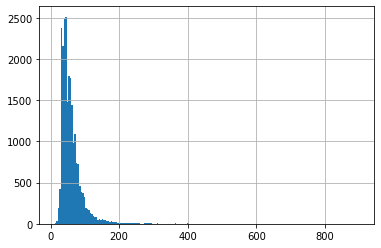

In [67]:
df['total_area'].hist(bins=200);

(-50.0, 125.0)

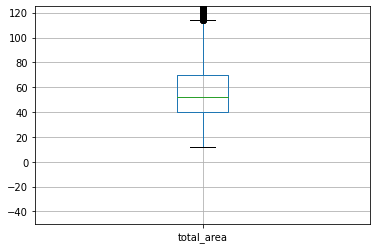

In [68]:
df.boxplot(column='total_area')
plt.ylim(-50, 125)

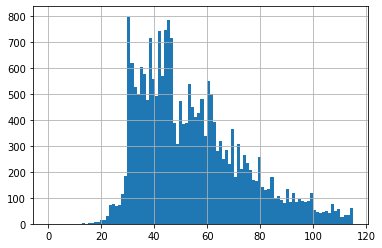

In [69]:
df['total_area'].hist(bins=100, range=(0, 115));

In [70]:
df['total_area'].describe()

count    23562.000000
mean        60.324656
std         35.658884
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Наиболее часто встречающиеся квартиры площадью от 35м2 до 70м2. Пик(наибольшее количество объявлений) в районе 35м2 и 45м2. Можно сделать вывод, что после 50м2, чем больше площадь квартиры, тем таких объявлений меньше.

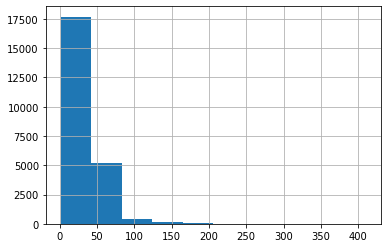

In [71]:
df['living_area'].hist();

(0.0, 90.0)

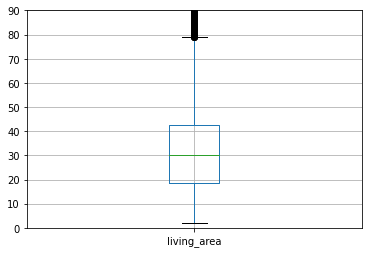

In [72]:
df.boxplot(column='living_area')
plt.ylim(0,90)

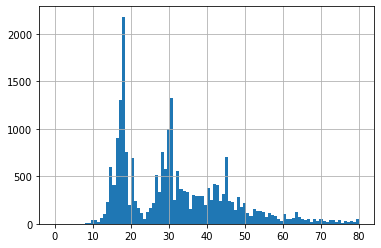

In [73]:
df['living_area'].hist(bins = 100, range=(0, 80));

In [74]:
df['living_area'].describe()

count    23562.000000
mean        34.325988
std         21.723060
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

На графике видно, что наибольшее количество объявлений с жилой площадью около 17-18м2, 30м2 и 45м2. Скорее всего это связанно с типичными размерами 1,2-ух и 3-ех, комнатных квартир. 
Так же есть провал в районе 23м2, возможно такие размеры жилой площади квартир не характерны, для типовой планировки. Вероятно такая жилая площадь выходит на стыке типичных размеров однушек и двушек. 

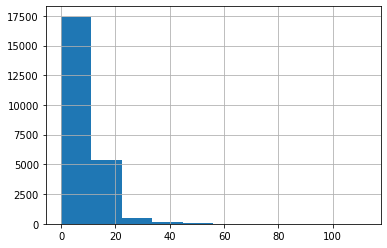

In [75]:
df['kitchen_area'].hist();

(0.0, 20.0)

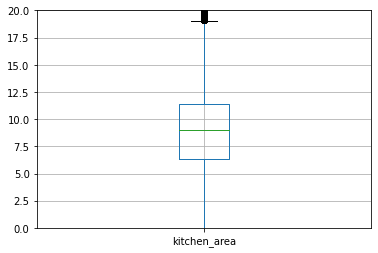

In [76]:
df.boxplot(column='kitchen_area')
plt.ylim(0, 20)

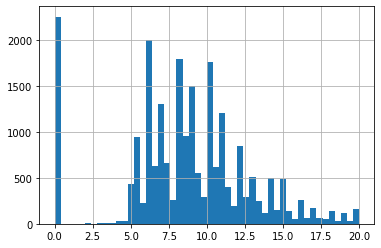

In [77]:
df['kitchen_area'].hist(bins=50, range=(0, 20));

In [78]:
df['kitchen_area'].describe()

count    23562.000000
mean         9.539059
std          6.382988
min          0.000000
25%          6.300000
50%          9.000000
75%         11.400000
max        112.000000
Name: kitchen_area, dtype: float64

На графике видно, что больше всего квартир без кухни, это студии, апартаменты и квартиры со свободной планировкой. Наиболее типичные размеры кухни от 6 до 12м2. В среднем площадь кухни составляет 34 м2.

In [79]:
df['last_price'] = df['last_price'].astype('int')

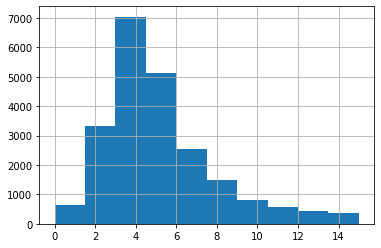

In [80]:
(df['last_price']/1e6).hist(range=(0, 15));

(0.0, 15000000.0)

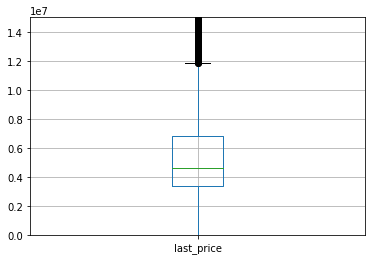

In [81]:
df.boxplot(column='last_price')
plt.ylim(0, 15000000)

In [82]:
df['last_price'].describe()

count    2.356200e+04
mean     6.540399e+06
std      1.091157e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646500e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Больше всего квартир продается в диапазоне от 3.4млн до 6.8 млн. Распределение цены похоже на нормальное.

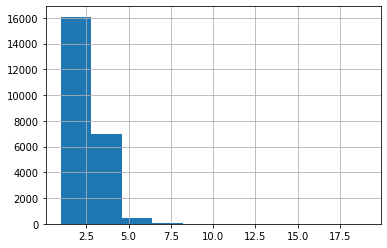

In [83]:
df['rooms'].hist();

(0.0, 7.0)

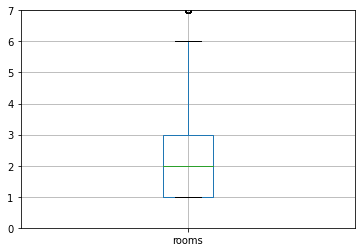

In [84]:
df.boxplot(column='rooms')
plt.ylim(0, 7)

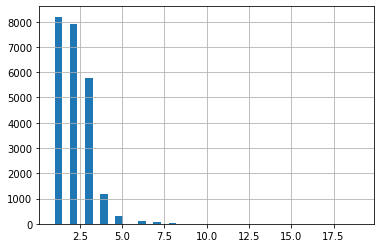

In [85]:
df['rooms'].hist(bins=40);

In [86]:
df['rooms'].describe()

count    23562.000000
mean         2.078941
std          1.066547
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Наибольшее количество квартир в продаже одно и двух комнатные - около 8000 объявлений для каждого типа квартиры соответственно. 3-ех комнатных около 6000 объявлений. 4-ех чуть больше 1000. 5-ти и более комнатных квартир незначительное количество предложений.

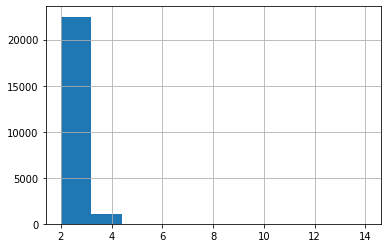

In [87]:
df['ceiling_height'].hist();

(2.0, 3.0)

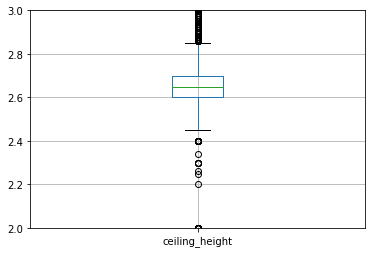

In [88]:
df.boxplot(column='ceiling_height')
plt.ylim(2, 3)

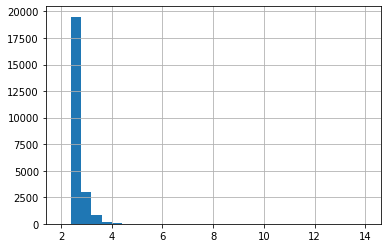

In [89]:
df['ceiling_height'].hist(bins=30);

In [90]:
df['ceiling_height'].describe()

count    23562.000000
mean         2.698922
std          0.253141
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Наибольшее количество объявлений с высотой потолков в диапазоне от 2.5м до 3м. Квартиры с высотой потолков менее 2.45м2 и более 2.85м2 являются выбросами. В среднем высота потолка в продаваемой квартире составляет 2.69м

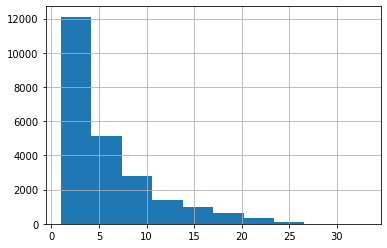

In [91]:
df['floor'].hist();

(0.0, 20.0)

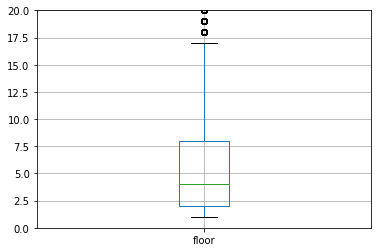

In [92]:
df.boxplot(column='floor')
plt.ylim(0, 20)

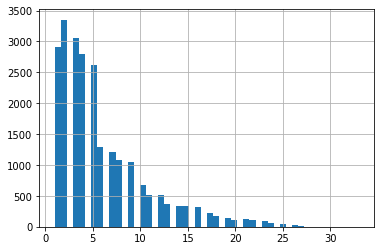

In [93]:
df['floor'].hist(bins=50);

In [94]:
df['floor'].describe()

count    23562.000000
mean         5.878321
std          4.871683
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Судя по графику больше всего объявлений до 5 этажей. Значительно меньше с 5 по 15 этаж. И судя по графику на более высоких этажах предложений крайне мало.

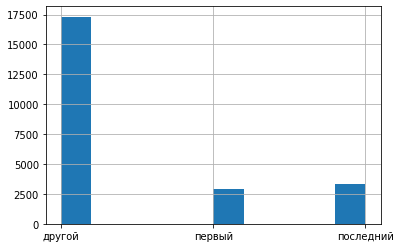

In [95]:
df['floor_type'].hist();


Судя по графику предложений на последнем этаже больше чем на первом этаже. Но в целом эти показатели практически равны.

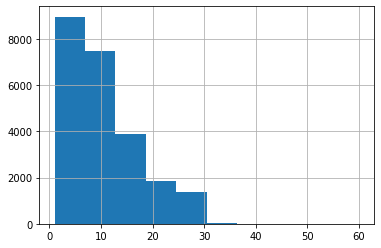

In [96]:
df['floors_total'].hist();

<AxesSubplot:>

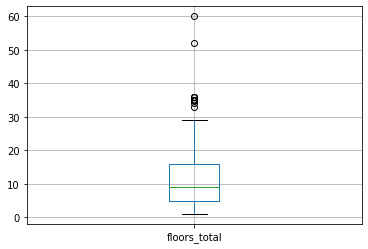

In [97]:
df.boxplot(column='floors_total')

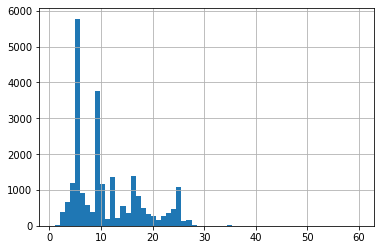

In [98]:
df['floors_total'].hist(bins=60);

In [99]:
df['floors_total'].describe()

count    23562.000000
mean        10.675070
std          6.592765
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Больше всего предложений в 5-ти и 10-ти этажных домах.

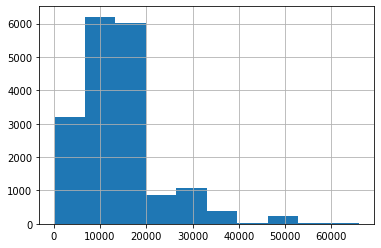

In [100]:
df['city_centers_nearest'].hist();

(0.0, 30000.0)

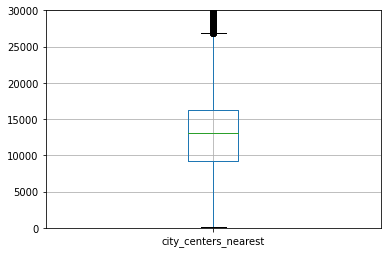

In [101]:
df.boxplot(column='city_centers_nearest')
plt.ylim(0, 30000)

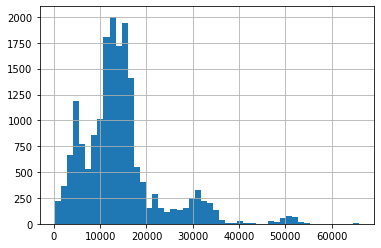

In [102]:
df['city_centers_nearest'].hist(bins=50);

In [103]:
df['city_centers_nearest'].describe()

count    18062.000000
mean     14192.308604
std       8613.699436
min        181.000000
25%       9238.000000
50%      13095.000000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Больше всего предложений по продаже в радиусе от 9км до 16км до центра.

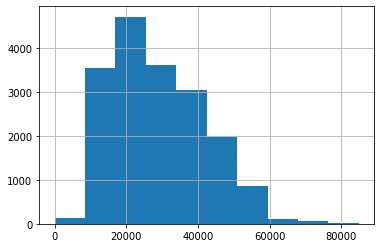

In [104]:
df['airports_nearest'].hist();

(0.0, 70000.0)

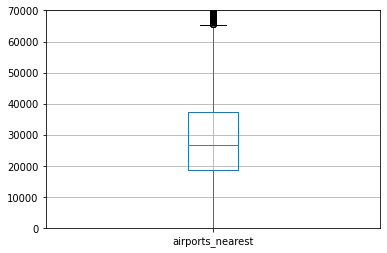

In [105]:
df.boxplot(column='airports_nearest')
plt.ylim(0, 70000)

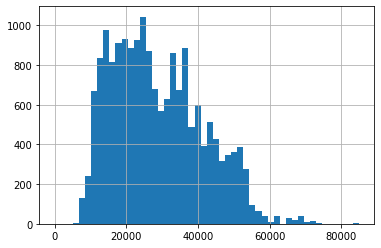

In [106]:
df['airports_nearest'].hist(bins=50);

In [107]:
df['airports_nearest'].describe()

count    18039.000000
mean     28797.404734
std      12632.938012
min          0.000000
25%      18561.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [108]:
df.shape

(23562, 29)

Перезапишем столбец airports_nearest, чтобы убрать 0 значение, т.к. это явно выброс, в центра аэропорта не может быть жилых квартир на продажу.

In [109]:
df = df.loc[df['airports_nearest'] != 0]

In [110]:
df.shape

(23561, 29)

In [111]:
df['airports_nearest'].describe()

count    18038.000000
mean     28799.001220
std      12631.468286
min       6450.000000
25%      18567.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Больше всего предложений по продаже в радиусе от 18 до 37 км до аэропорта. Ближайшее к аэропорту предложение расположено в 6450м, а самое дальнее в 84869м.

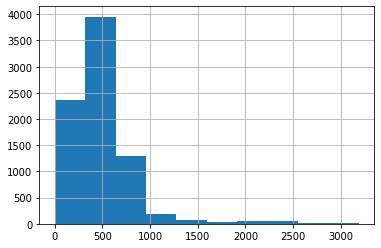

In [112]:
df['parks_nearest'].hist();

(0.0, 1200.0)

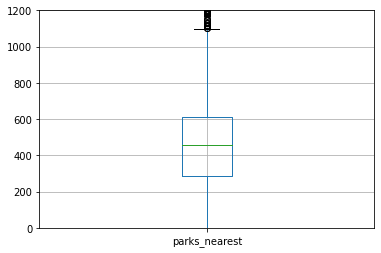

In [113]:
df.boxplot(column='parks_nearest')
plt.ylim(0, 1200)

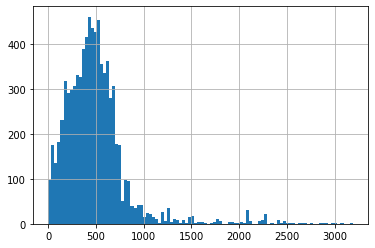

In [114]:
df['parks_nearest'].hist(bins=100);

In [115]:
df['parks_nearest'].describe()

count    8029.000000
mean      490.605057
std       341.587110
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Большинство предложений о продаже расположены в шаговой доступности от парков. Расстояние колеблется от примерно 300 до 600 метров.

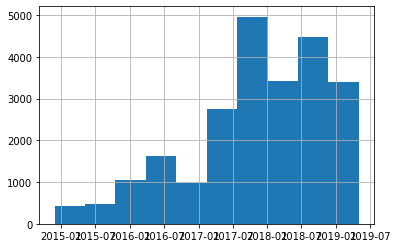

In [116]:
df['first_day_exposition'].hist();

In [117]:
df['first_day_exposition'].value_counts()

2018-02-01    366
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2016-08-26      1
2016-08-18      1
2015-07-11      1
2016-10-23      1
2015-08-02      1
Name: first_day_exposition, Length: 1489, dtype: int64

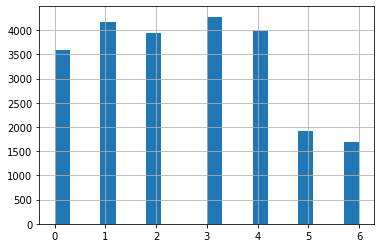

In [118]:
df['day_of_week'].hist(bins=20);

Судя по графику чаще всего выставляют на продажу в будние дни, в выходные дни примерно в 2 раза меньше публикуют объявления.

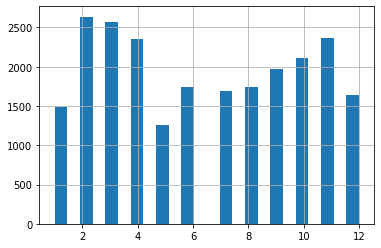

In [119]:
df['month_of_publicatione'].hist(bins=24);

Судя по графику чаще всего выставляют на продажу в феврале, марте, апреле. Потом идет спад в мае. И плавный рост с июня по ноябрь. В последний и первый месяцы так же фиксируется уменьшение предложений.

Изучим как быстро продавались квартиры

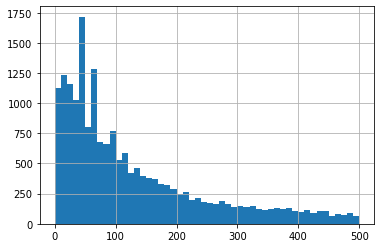

In [120]:
df['days_exposition'].hist(bins=50, range=(0, 500));

In [121]:
df['days_exposition'].value_counts()

45.0      879
60.0      537
7.0       234
30.0      208
90.0      200
         ... 
1349.0      1
1084.0      1
1050.0      1
1228.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64

(-10.0, 600.0)

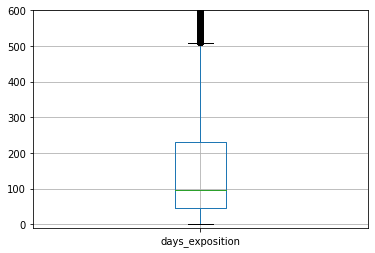

In [122]:
df.boxplot(column='days_exposition')
plt.ylim(-10, 600)

In [123]:
df['days_exposition'].describe()

count    20390.000000
mean       180.757626
std        219.747719
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем продажа квартиры происходит за 180 дней. Но на эти данные сильно влияют излишне долгие продажи от 500 до 1580 дней(выбросы). Получить же более точные данные и правильнее интерпретировать статистику поможет медиана. Она равна 95 дням.
В основной массе человек выставивший на продажу квартиру должен расчитывать, что квартиры чаще всего продаются в диапазоне от 45дней до 231 дня. Но бывают и быстрые продажи. Таковыми считаются продажи от 1 дня до 45 дней. Так же на графике видны пики которые соотвествуют 7, 45 и 60 дням, можно предположить что в данные дни заканчиваются срок публикации обьявления, и они автоматически снимаются. 

Факторы которые больше всего влияют на общую (полную) стоимость объекта.

Зависимость цены от общей площади.

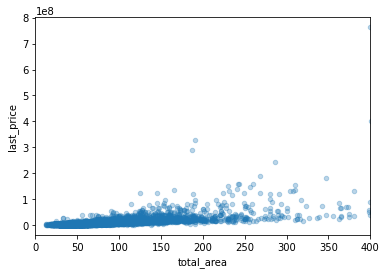

In [124]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, xlim=(0, 400));


In [125]:
df['total_area'].corr(df['last_price'])

0.6536263604957433

Зависимость есть, чем больше площадь, тем больше цена, что подтверждает средняя корреляция = 0.65.

Зависимость цены от жилой площади.

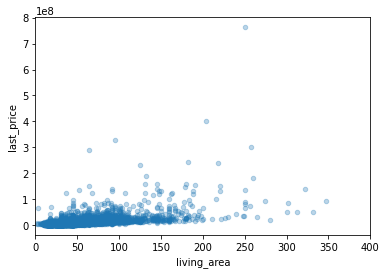

In [126]:
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, xlim=(0, 400));


In [127]:
df['living_area'].corr(df['last_price'])

0.5560597310849922

В зависимости от величины жилой площади, увеличивается и цена, что подтверждает средняя корреляция = 0.55.

Зависимость цены от размера кухни

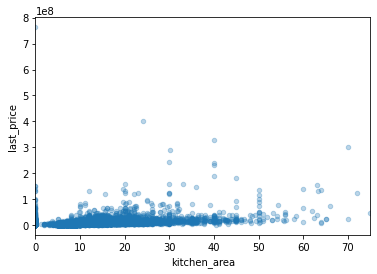

In [128]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, xlim=(0, 75));

In [129]:
df['kitchen_area'].corr(df['last_price'])

0.38134811895940113

Зависимость цены от размера кухни слабо выражена, что подтверждает слабая корреляция = 0.38.

Зависимость цены от количества комнат.

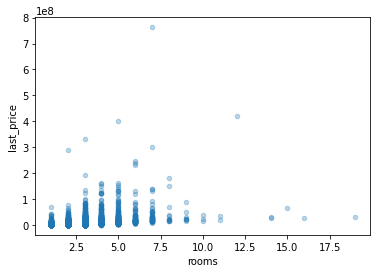

In [130]:
df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3);

In [131]:
df['rooms'].corr(df['last_price'])

0.3650547761016779

В зависимости от количества комнат, цена изменяется слабо. Корреляцией слабая = 0.36 

Зависимость цены от этажа, на котором расположена квартира.

In [132]:
df['floor_type'].value_counts()

другой       17323
последний     3330
первый        2908
Name: floor_type, dtype: int64

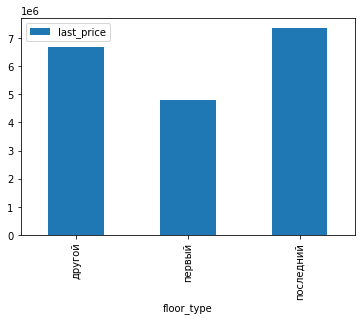

In [133]:
(df
 .pivot_table(index='floor_type', values='last_price')
 .plot.bar()
);


Ниже всего цены для квартир на первом этаже, самые высокие цены для последних этажей. Квартиры на всех других этажах в ценовой категории находятся между первым и последним этажами.

Зависимость цены от дня недели размещения объявления.

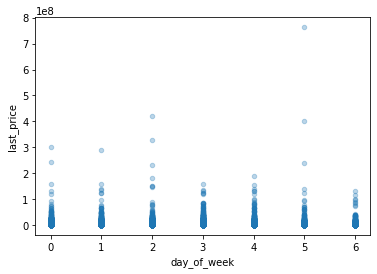

In [134]:
df.plot(x='day_of_week', y='last_price', kind='scatter', alpha=0.3);


In [135]:
df['day_of_week'].corr(df['last_price'])

0.0013165506383707474

Зависмость цены от дня недели отсутствует. Корреляция = 0.001, следовательно переменные не связаны между собой.

Зависимость цены от месяца размещения объявления.

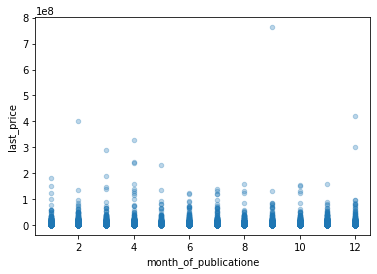

In [136]:
df.plot(x='month_of_publicatione', y='last_price', kind='scatter', alpha=0.3);

In [137]:
df['month_of_publicatione'].corr(df['last_price'])

0.002745725936939311

Зависимость отсутствует. Корреляцией = 0.002, следовательно переменные не связаны между собой.

Влияние года публикации на стоимость жилья и влияние года публикации на цену за м2.

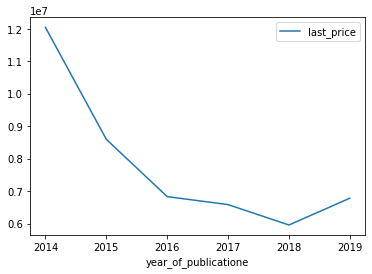

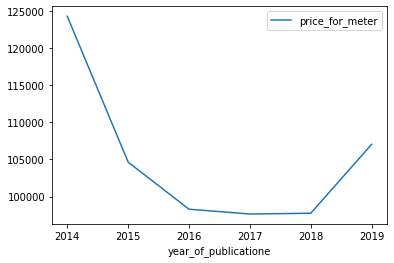

In [138]:
(df
 .pivot_table(index='year_of_publicatione', values='last_price')
 .plot()
);
plt.show()
(df
 .pivot_table(index='year_of_publicatione', values='price_for_meter')
 .plot()
);
plt.show()

In [139]:
df['year_of_publicatione'].corr(df['last_price'])

-0.04287551340281128

In [140]:
df['year_of_publicatione'].corr(df['price_for_meter'])

0.008552946622583638

Начиная с 2014 года идет снижение цены вплоть до конца 2018г. С начала 2018г и весь 2019г происходит постепенный рост.
Цена за м2 так же снижается начиная 2014 года до 2016г. С 2016г. до 2018г. цена за м2 практически не меняется и только в 2018г начинается опять рост цены за м2.

#### Изучим факторы, влияющие на общую стоимость объекта недвижимости ####

**Влияние общей площади на полную стоимость объекта**

Расчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [141]:
data = df.pivot_table(index='locality_name', values='price_for_meter', aggfunc=['mean', 'count', 'median'])

In [142]:
data.columns = ('mean', 'count', 'median')

In [143]:
data_top_10 = data.sort_values(by='count', ascending=False).head(10)

In [144]:
data_top_10

,mean,count,median
locality_name,,,
Санкт-Петербург,114864.486149,15648,104772.401062
посёлок Мурино,85673.259928,520,85878.462169
посёлок Шушары,78551.344545,439,76829.268293
Всеволожск,68654.473986,398,65789.473684
Пушкин,103125.819291,369,100000.000000
Колпино,75424.579098,338,74723.748474
посёлок Парголово,90175.913458,327,91642.857143
Гатчина,68746.146763,307,67796.610169
деревня Кудрово,92473.547576,299,91860.465116


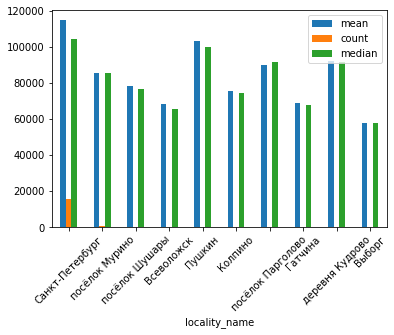

In [145]:
data_top_10.plot(kind='bar', rot=45);

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>   
    Нужно построить столбчатую диограмму по медианной цене м2?
</div>
    

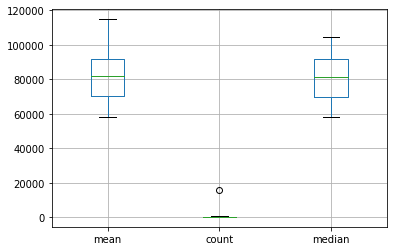

In [146]:
data_top_10.boxplot();

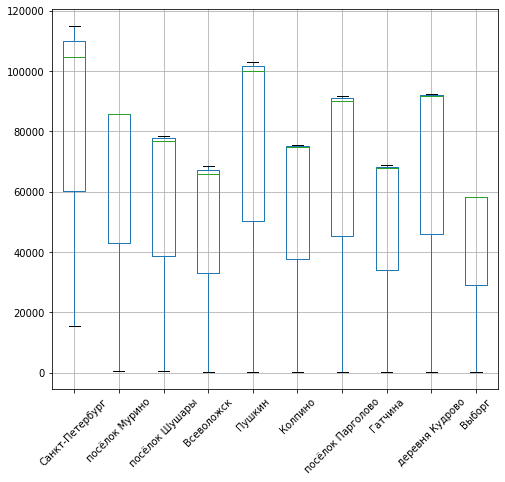

In [147]:
data_top_10.T.plot(kind='box', figsize=(8,7), rot=45, grid=True);

In [148]:
data_top_10.describe()

,mean,count,median
count,10.000000,10.000000,10.000000
mean,83583.147995,1888.200000,81745.160598
std,17222.241068,4835.351183,15491.259952
min,58141.909153,237.000000,58158.319871
25%,70415.754847,312.000000,69528.394746
50%,82112.302237,353.500000,81353.865231
75%,91899.139046,428.750000,91806.063123
max,114864.486149,15648.000000,104772.401062


(0.0, 200000.0)

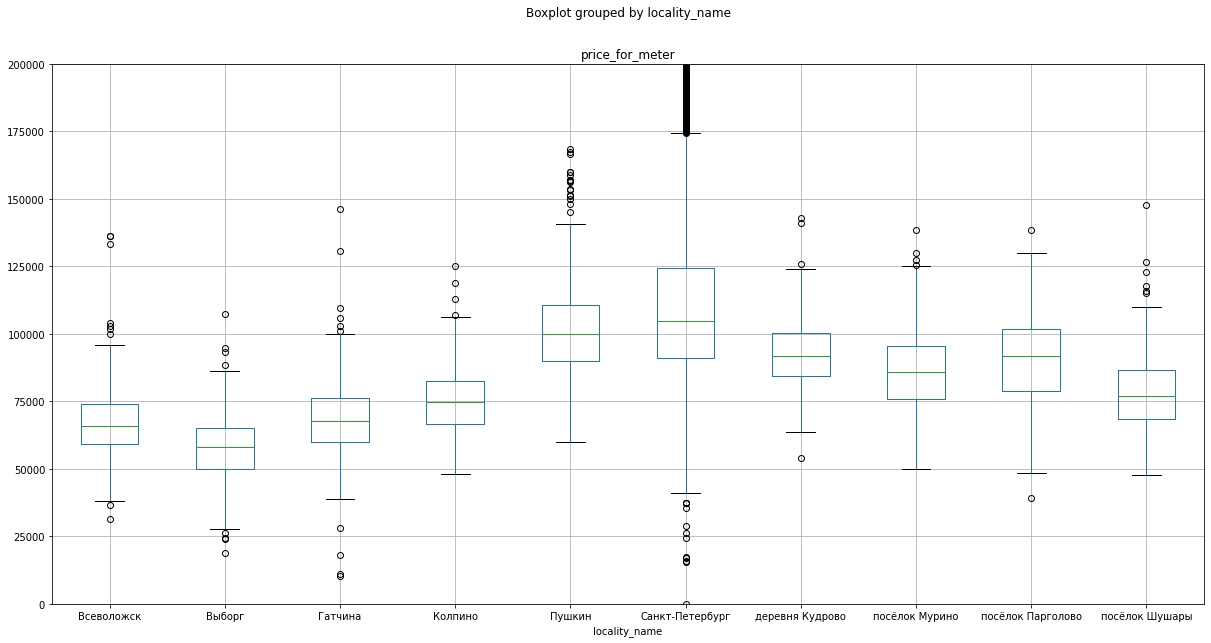

In [161]:
# Код ревьюера

ax = (df
    .query('locality_name in @data_top_10.index')
    .boxplot('price_for_meter', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 200000)

In [149]:
data.sort_values(by='mean', ascending=False).tail()

,mean,count,median
locality_name,,,
поселок Совхозный,12629.129129,2,12629.129129
деревня Выскатка,12335.480902,2,12335.480902
деревня Вахнова Кара,11688.311688,1,11688.311688
посёлок станции Свирь,11481.481481,2,11481.481481
деревня Старополье,11206.221198,3,11000.000000


Населенный пункт с самой высокой стоимость квадратного метра Санкт-Петербург(114870р за кв м). Самая низкая стоимость в населенном пункте деревня Старополье(11206.2р за кв м)

 Расчитаем как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге.

Отфильтруем из датафрейма значения только для Санкт-Петербурга

In [150]:
data_spb = df.loc[df['locality_name'] == 'Санкт-Петербург']

Поделим цену недвижимости в Санкт-Петербурге на расстояние до центра Санкт-Петербурга, для того чтобы узнать как цена меняется по мере удаленности от центра.

In [151]:
data_spb['price_for_km_spb'] = (data_spb['last_price'] / data_spb['city_centers_nearest_in_km'])

Объеденим данные в сводной таблице.

In [152]:
data_spb_km = data_spb.pivot_table(index='city_centers_nearest_in_km', values='price_for_km_spb',\
                                   aggfunc=['mean', 'median']).round()

In [153]:
data_spb_km.head(30)

,mean,median
,price_for_km_spb,price_for_km_spb
city_centers_nearest_in_km,,
0.0,inf,inf
1.0,21206721.0,11395000.0
2.0,8894160.0,5000000.0
3.0,3712465.0,2803000.0
4.0,3326070.0,2300000.0
5.0,2891199.0,1898000.0
6.0,2556403.0,1483333.0
7.0,2110736.0,1114286.0


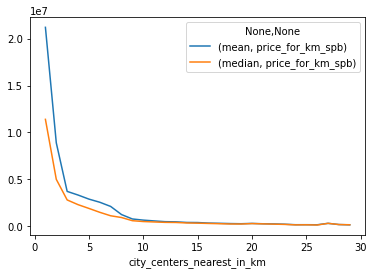

In [154]:
data_spb_km.plot();

In [155]:
data_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_locality_name,price_for_meter,day_of_week,month_of_publicatione,year_of_publicatione,floor_type,city_centers_nearest_in_km,price_for_km_spb
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0,8.125000e+05
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0,3.711429e+05
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,45.0,9,True,False,False,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,другой,7.0,9.271429e+06
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0,1.250000e+06
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.5,22,True,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,110544.692737,3,4,2019,другой,12.0,6.595833e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23555,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.3,4,True,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,Санкт-Петербург,100566.572238,2,2,2018,другой,16.0,2.218750e+05
23556,3,5500000,52.00,2018-07-19,2,2.65,5.0,31.0,2,True,False,False,6.00,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,Санкт-Петербург,105769.230769,3,7,2018,другой,6.0,9.166667e+05
23557,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,True,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,Санкт-Петербург,129903.978052,3,10,2016,другой,4.0,2.367500e+06
23560,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,Санкт-Петербург,72490.845228,1,3,2017,другой,4.0,2.425000e+06


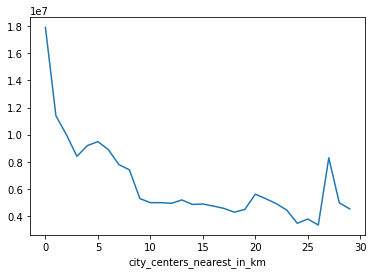

In [156]:
median_spb = data_spb.groupby('city_centers_nearest_in_km')['last_price'].median().plot();

In [157]:
median_spb = data_spb.groupby('city_centers_nearest_in_km')['last_price'].median()

In [158]:
median_spb

city_centers_nearest_in_km
0.0     17900000
1.0     11395000
2.0     10000000
3.0      8409000
4.0      9200000
5.0      9490000
6.0      8900000
7.0      7800000
8.0      7420000
9.0      5300000
10.0     5000000
11.0     5000000
12.0     4950000
13.0     5200000
14.0     4870000
15.0     4900000
16.0     4750000
17.0     4580000
18.0     4300000
19.0     4500000
20.0     5625000
21.0     5289476
22.0     4925000
23.0     4450000
24.0     3480000
25.0     3794881
26.0     3355000
27.0     8300000
28.0     4990000
29.0     4535000
Name: last_price, dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23561 entries, 0 to 23564
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23561 non-null  int64         
 1   last_price                  23561 non-null  int64         
 2   total_area                  23561 non-null  float64       
 3   first_day_exposition        23561 non-null  datetime64[ns]
 4   rooms                       23561 non-null  int64         
 5   ceiling_height              23561 non-null  float64       
 6   floors_total                23561 non-null  float64       
 7   living_area                 23561 non-null  float64       
 8   floor                       23561 non-null  int64         
 9   is_apartment                23561 non-null  bool          
 10  studio                      23561 non-null  bool          
 11  open_plan                   23561 non-null  bool      

### Общий вывод

Мы обработали и изучили данные из сервиса Яндекс Недвижимость. А именно архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**Предобработка данных.**

Изначально в датафрейме содержались пропуски, и ошибки в названиях столбцов. Мы переименовали неправильно названные столбцы, удалили пропуски в двух столбцах: 'название населённого пункта', 'всего этажей в доме' т.к. они не имели статистической значимости(0.21% и 0.36% соответственно), но мешали дальнейшей предобработке. 


Заполнили пропуски в столбце с жилой площадью в квадратных метрах (м²) медианным значением по каждому типу (количество комнат).
Заполнили пропуски в столбце 'площадь кухни в квадратных метрах (м²)' нулевыми значениями для апартаментов, студий и квартир со свободной планировкой т.к. в таких типах квартир отдельной комнаты для кухни не предусмотрено.
Заполнили пропуски в столбце 'число балконов' нулевыми значениями т.к. скорее всего пропуски в данном столбце вызваны тем, что если не указан балкон, то это означает, что его в таких квартирах нет. 


Заменили 0 значения на 1 в столбце 'число комнат', т.к. по общей площади эти квартиры совпадают с небольшими однокомнатными и апартаментами. 
Преобразовали тип данных в столбце 'апартаменты' из object в bool и заполнили пропуски значениями False, для корректной обработки в дальнейшем данных значений.
Так же изменили тип данных в столбце 'дата публикации' с object на формат datetime т.к. в данном столбце записано время и дата. Это необходимо для того, чтобы в дальнейшем было возможно рассчитать день недели, месяц и год публикации объявления.
В значениях столбца 'название населённого пункта' встречались неявные дубликаты, чтобы очистить столбец от дубликатов, мы заменили не уникальные названия на пробел, а после удалили пробелы перед уникальными названиями.
Исправили аномально большие значения высоты потолков путем деления этих значений на 10. Заменили значение с множеством знаков после запятой, на значение с двумя знаками после запятой. Так же удалили 3 строки с аномально низкими высотами потолков 1, 1.2 и 1.75 м.


Округлили аномальные значения, с большим количеством 0 после запятой в столбце 'сколько дней было размещено объявление (от публикации до снятия)'. И тем самым мы избавились от знаков после запятой, которые вероятно появились из-за технической ошибки. Столбец 'days_exposition' (сколько дней было размещено объявление (от публикации до снятия)) подразумевает только целое число дней.

После предобработки данных мы избавились от пропусков(там где это было возможно), неверных типов данных и дубликатов, которые помешали бы дальнейшему анализу данных.

**Добавление в таблицу новых столбцов.**

Мы добавили в таблицу столбец с ценой одного квадратного метра. Нашли мы данное значение поделив цену на общую площадь квартиры.
Добавили столбец публикаций объявлений по дням недели применив метод .dt.weekday
Добавили столбец публикаций объявлений  по месяцам применив метод pd.DatetimeIndex(df[...]).month
Добавили столбец публикаций объявлений по годам применив метод pd.DatetimeIndex(df[...]).year
С помощью функции определили тип этажа квартиры и добавили столбец с 'типом этажей'.
Поделив значения столбца 'расстояние до центра города (м)' на 1000 и округлив значения узнали расстояние до центра в км. И записали в соответствующий столбец 'city_centers_nearest_in_km'

**Исследовательский анализ данных**

 - Параметры объектов.

Изучив общую площадь объектов определили, что наиболее часто встречающиеся квартиры площадью от 35м2 до 70м2. Пик(наибольшее количество объявлений) в районе 35м2 и 45м2. Так же можно сделать вывод, что после 50м2, чем больше площадь квартиры, тем таких объявлений меньше.


Изучив жилую площадь объектов определили, что наибольшее количество объявлений с жилой площадью около 17-18м2, 30м2 и 45м2. Скорее всего это связанно с типичными размерами 1,2-ух и 3-ех, комнатных квартир. Так же есть провал в районе 23м2, возможно такие размеры жилой площади квартир не характерны, для типовой планировки. Вероятно такая жилая площадь выходит на стыке типичных размеров однушек и двушек. 


Изучив площадь кухни объектов определили, что больше всего квартир без кухни, это студии, апартаменты и квартиры со свободной планировкой. Наиболее типичные размеры кухни от 6 до 12м2. 
Изучив цену объектов определили, что больше всего квартир продается в диапазоне от 3.4млн до 6.8 млн. Распределение цены похоже на нормальное.


Изучив количество комнат объектов определили, что наибольшее количество квартир в продаже одно и двух комнатные - около 8000 объявлений для каждого типа квартиры соответственно. 3-ех комнатных около 6000 объявлений. 4-ех чуть больше 1000. 5-ти и более комнатных квартир незначительное количество предложений.


Изучив высоту потолков объектов определили, что наибольшее количество объявлений с высотой потолков в диапазоне от 2.5м до 3м. Квартиры с высотой потолков менее 2.45м2 и более 2.85м2 являются выбросами.


Изучив этажность квартир определили, что больше всего объявлений до 5 этажей. Значительно меньше с 5 по 15 этаж. На более высоких же этажах предложений крайне мало.


Изучив тип этажа квартиры («первый», «последний», «другой») определили, что на последнем этаже больше чем на первом этаже. Но в целом эти показатели практически равны. Количество предложений на других, кроме первого и последнего этажа в разы больше.
Изучив общее количество этажей в доме определили, что больше всего предложений в 5-ти и 10-ти этажных домах.


Изучив расстояние от объектов до центра города в метрах определили, что больше всего предложений по продаже в радиусе от 9км до 16км до центра.


Изучив расстояние от объектов до ближайшего аэропорта определили, что больше всего предложений по продаже в радиусе от 18 до 37 км до аэропорта.

Изучив расстояние от объектов до ближайшего парка определили, что большинство предложений о продаже расположены в шаговой доступности от парков. Расстояние колеблется от примерно 300 до 600 метров.

Изучив зависимость количества публикаций от дня недели определили, что чаще всего выставляют квартиры на продажу в будние дни, в выходные дни примерно в 2 раза меньше публикуют объявления.

Изучив зависимость количества публикаций по месяцам определили, что чаще всего выставляют на продажу в феврале, марте, апреле. Потом идет спад в мае. И плавный рост с июня по ноябрь. В последний и первый месяцы так же фиксируется уменьшение предложений.

 - Сроки публикации объявления.

Изучив, как быстро продавались квартиры определили, что в среднем продажа квартиры происходит за 180 дней. Но на эти данные сильно влияют излишне долгие продажи от 500 до 1580 дней(выбросы). Получить же более точные данные и правильнее интерпретировать статистику поможет медиана. Она равна 95 дням.
В основной массе человек выставивший на продажу квартиру должен рассчитывать, что квартиры чаще всего продаются в диапазоне от 45дней до 231 дня. Но бывают и быстрые продажи. Таковыми считаются продажи от 1 дня до 45 дней. Так же на графике видны пики которые соответствуют 7, 45 и 60 дням, можно предположить что в данные дни заканчивались сроки публикации объявлений, и они автоматически снимались. 

- Зависимость цены объекта от общей и жилой площади.

Изучив зависимость цены объектов от общей и жилой площади определили, что чем больше площадь, тем больше цена, что подтверждает средняя корреляция = 0.65 и 0.55 соответственно.

Изучив зависимость цены объектов от площади кухни определили, что данная зависимость слабо выражена, что подтверждает слабая корреляция = 0.38.

В зависимости от количества комнат, цена изменяется не значительно. Корреляцией слабая = 0.36

Изучив зависимость цены объектов от этажа, на котором расположена квартира (первый, последний, другой) определили, что ниже всего цены для квартир на первом этаже, самые высокие цены для последних этажей. Квартиры на всех других этажах в ценовой категории находятся между первым и последним этажами.

Изучив зависимость цены объектов от дня недели размещения определили, что зависмость цены от дня недели отсутствует. Корреляция = 0.001, следовательно переменные не связаны между собой.

Изучив  зависимость цены от месяца размещения объявления определили, что зависимость отсутствует. Корреляцией = 0.002, следовательно переменные не связаны между собой. 

Изучив влияние года публикации на стоимость жилья и влияние года публикации на цену за м2.
Определили, что начиная с 2014 года идет снижение цены вплоть до конца 2018г. С начала 2018г и весь 2019г происходит постепенный рост.

Цена за м2 так же снижается начиная 2014 года до 2016г. С 2016г. до 2018г. цена за м2 практически не меняется и только в 2018г начинается опять рост цены за м2.


 - Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.
Перечень из 10 населенных пунктов с самой высокой средней ценой квадратного метра, в порядке убывания: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, деревня Кудрово, Выборг.
    Медианное значение = 82112.3р. за м2.    
    Максимальная цена за м2 = 114864.4р в Санкт-Петербурге.     
    Минимальная = 58141.9р в Выборге.     
    Больше всего объявлений в диапазоне цен от 70415.7р. за м2 до 91899.1р за м2. 

 - Зависимость стоимости объекта жилой недвижимости от расстояния до центра города в Санкт-Петербурге.

Исходя из данных наблюдается уменьшение цены по мере удаления от центра.

В центре медианное значение цены за объект составляет 17900000р.

В радиусе 1 км от центра медианное значение цены составляет 11395000р.
    
К 10 км от центра медианное значение цены снижается до 500000р.
    
К 20 км 5625000р.
    
А в 30 км от центра медианное значение цены за объект равно 4535000р. 






